In [26]:
import pandas as pd
import numpy as np
import os,sys
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


train_data = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-profitable-customers/data/processed/train_processed.csv')


X_train = train_data.drop(['important_customer'],axis=1)
y_train = train_data['important_customer']

lr = LogisticRegression(class_weight={0:1,1:7},n_jobs=-1)

lr.fit(X_train,y_train)

## read test data
test_data = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-profitable-customers/data/processed/test_processed.csv')

X_test = test_data.drop(['important_customer'],axis=1)
y_test = test_data['important_customer']

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

# Get coefficients
coefficients = lr.coef_

# Intercept (if applicable)
intercept = lr.intercept_

print("Coefficients:", sorted(coefficients))
print("Intercept:", intercept)

              precision    recall  f1-score   support

           0       0.93      0.55      0.69      3622
           1       0.27      0.79      0.40       753

    accuracy                           0.59      4375
   macro avg       0.60      0.67      0.55      4375
weighted avg       0.81      0.59      0.64      4375

Coefficients: [array([ 0.15473897,  0.05995083, -0.01267274,  0.16206433,  0.01290377,
        0.10531661,  0.01415645,  0.00777847,  0.00540258, -0.06574817,
       -0.01069704,  0.02132679, -0.81231737,  0.81355188,  0.59670905,
        0.67697904,  0.20043929,  0.23150781, -0.66957327,  0.08502844,
        0.19886469,  0.08987367,  0.35806231, -0.10455765,  0.79790478])]
Intercept: [0.03352524]


In [27]:
X_train.shape[1]

25

In [30]:
coefficients[0]

array([ 0.15473897,  0.05995083, -0.01267274,  0.16206433,  0.01290377,
        0.10531661,  0.01415645,  0.00777847,  0.00540258, -0.06574817,
       -0.01069704,  0.02132679, -0.81231737,  0.81355188,  0.59670905,
        0.67697904,  0.20043929,  0.23150781, -0.66957327,  0.08502844,
        0.19886469,  0.08987367,  0.35806231, -0.10455765,  0.79790478])

In [47]:
coeff_imp = pd.DataFrame(index=X_train.columns, data = sorted(abs(coefficients[0]),reverse=True)).head()
coeff_imp = coeff_imp.reset_index()
coeff_imp

,index,0
0,purchase_amount,0.813552
1,asset_amount,0.812317
2,average_ratio,0.797905
3,personal_id_2,0.676979
4,average_favorite_score,0.669573


In [40]:
import seaborn as sns

Text(0.5, 1.0, 'Countplot of Feature Importance based on Coefficients')

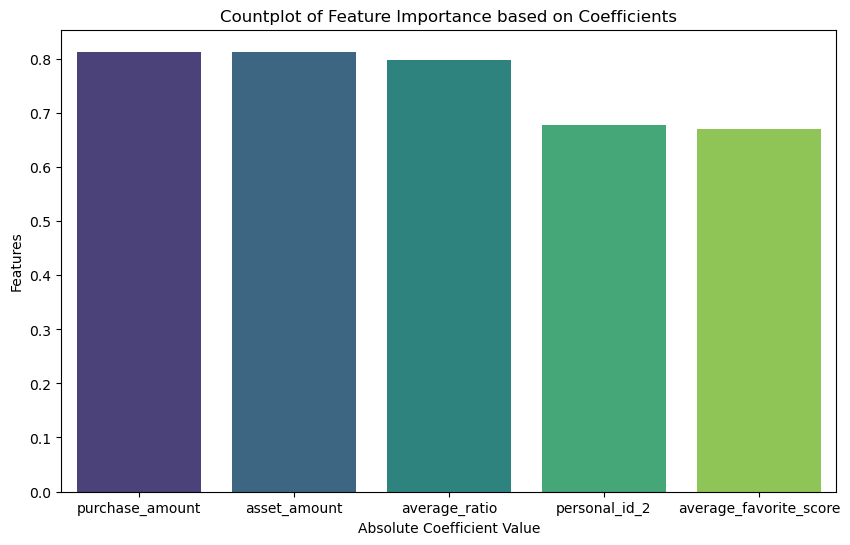

In [52]:
plt.figure(figsize=(10, 6))

sns.barplot(y=0, x='index', data=coeff_imp, palette='viridis',orient='v')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Countplot of Feature Importance based on Coefficients')